# Step 1️: Dataset Exploration

In [1]:
## 1.1 Load Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans


## 1.2 Load the Datasets

In [3]:
# Load the dataset (Climate Change Performance Index & GHG Emissions)
df_ccpi = pd.read_csv("Dataset/climate_change_dataset.csv")
df_ghg = pd.read_csv("Dataset/GCB2022v27_MtCO2_flat.csv")

# Display basic information
print("CCPI Dataset Info:")
print(df_ccpi.info())
print(df_ccpi.head())

print("\nGHG Emissions Dataset Info:")
print(df_ghg.info())
print(df_ghg.head())


CCPI Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        48 non-null     object 
 1   Month                       48 non-null     object 
 2   Avg_Temp (°C)               46 non-null     float64
 3   Max_Temp (°C)               46 non-null     object 
 4   Min_Temp (°C)               45 non-null     object 
 5   Precipitation (mm)          49 non-null     object 
 6   Humidity (%)                45 non-null     object 
 7   Wind_Speed (m/s)            51 non-null     object 
 8   Solar_Irradiance (W/m²)     48 non-null     object 
 9   Cloud_Cover (%)             49 non-null     object 
 10  CO2_Concentration (ppm)     47 non-null     float64
 11  Latitude                    47 non-null     object 
 12  Longitude                   50 non-null     object 
 13  Altitude (m)      

# 1.3 Check for Missing Values

In [4]:
print("\nMissing Values in CCPI Dataset:")
print(df_ccpi.isnull().sum())

print("\nMissing Values in GHG Dataset:")
print(df_ghg.isnull().sum())



Missing Values in CCPI Dataset:
Year                          5
Month                         5
Avg_Temp (°C)                 7
Max_Temp (°C)                 7
Min_Temp (°C)                 8
Precipitation (mm)            4
Humidity (%)                  8
Wind_Speed (m/s)              2
Solar_Irradiance (W/m²)       5
Cloud_Cover (%)               4
CO2_Concentration (ppm)       6
Latitude                      6
Longitude                     3
Altitude (m)                  4
Proximity_to_Water (km)       6
Urbanization_Index            3
Vegetation_Index              3
ENSO_Index                    3
Particulate_Matter (µg/m³)    3
Sea_Surface_Temp (°C)         7
dtype: int64

Missing Values in GHG Dataset:
Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Pe

# step 2: Data Preprocessing & Cleaning

## 2.1 Convert Numeric Columns & Handle Missing Values

In [5]:
# Convert all numeric columns properly
for col in df_ccpi.columns:
    df_ccpi[col] = pd.to_numeric(df_ccpi[col], errors='coerce')

# Fill missing values with median
df_ccpi.fillna(df_ccpi.median(), inplace=True)


##  2.2 Feature Selection

In [6]:
# Define relevant features
features = [
    "CO2_Concentration (ppm)", "Avg_Temp (°C)", "Precipitation (mm)", 
    "Humidity (%)", "Wind_Speed (m/s)", "Solar_Irradiance (W/m²)", 
    "Urbanization_Index", "Vegetation_Index"
]

# Ensure all selected features exist in the dataset
missing_features = [col for col in features if col not in df_ccpi.columns]
if missing_features:
    print(f"❌ Missing Features: {missing_features}")
else:
    print("✅ All selected features exist in the dataset!")


✅ All selected features exist in the dataset!


## 2.3 Normalize Features

In [7]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_ccpi[features]), columns=features)


# Step 3️: Generate a Synthetic CCPI Score

In [12]:
# Generate synthetic CCPI Score
df_scaled["CCPI_Score"] = (
    (-df_scaled["CO2_Concentration (ppm)"] * 0.3) +  # Higher CO₂ → Lower CCPI
    (-df_scaled["Avg_Temp (°C)"] * 0.2) +            # Higher Temp → Lower CCPI
    (df_scaled["Urbanization_Index"] * 0.3) +        # More Urbanization → Higher CCPI
    (df_scaled["Vegetation_Index"] * 0.2) +          # More Vegetation → Higher CCPI
    (df_scaled["Precipitation (mm)"] * 0.1) +       # Stable Rainfall → Higher CCPI
    (df_scaled["Wind_Speed (m/s)"] * 0.1) +         # More Wind Energy → Higher CCPI
    (df_scaled["Solar_Irradiance (W/m²)"] * 0.2)    # More Solar Energy → Higher CCPI
)

# Scale CCPI Score between 0-100
df_scaled["CCPI_Score"] = 100 * (df_scaled["CCPI_Score"] - df_scaled["CCPI_Score"].min()) / (df_scaled["CCPI_Score"].max() - df_scaled["CCPI_Score"].min())

# Display sample results



# Step 4️: Exploratory Data Analysis (EDA) & Feature Selection

## 4.1 Visualize the Distribution of CCPI Scores

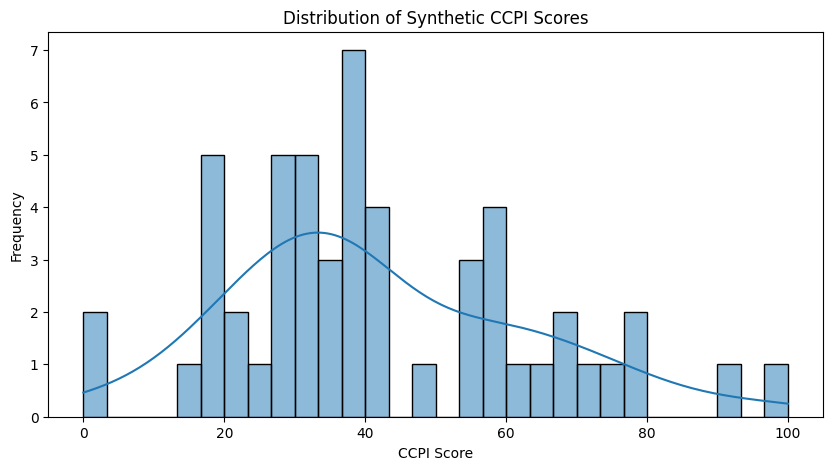

In [14]:
df= df_scaled.copy()
plt.figure(figsize=(10, 5))
sns.histplot(df['CCPI_Score'], bins=30, kde=True)
plt.title("Distribution of Synthetic CCPI Scores")
plt.xlabel("CCPI Score")
plt.ylabel("Frequency")
plt.show()


## 4.2 Heatmap of Feature Correlations

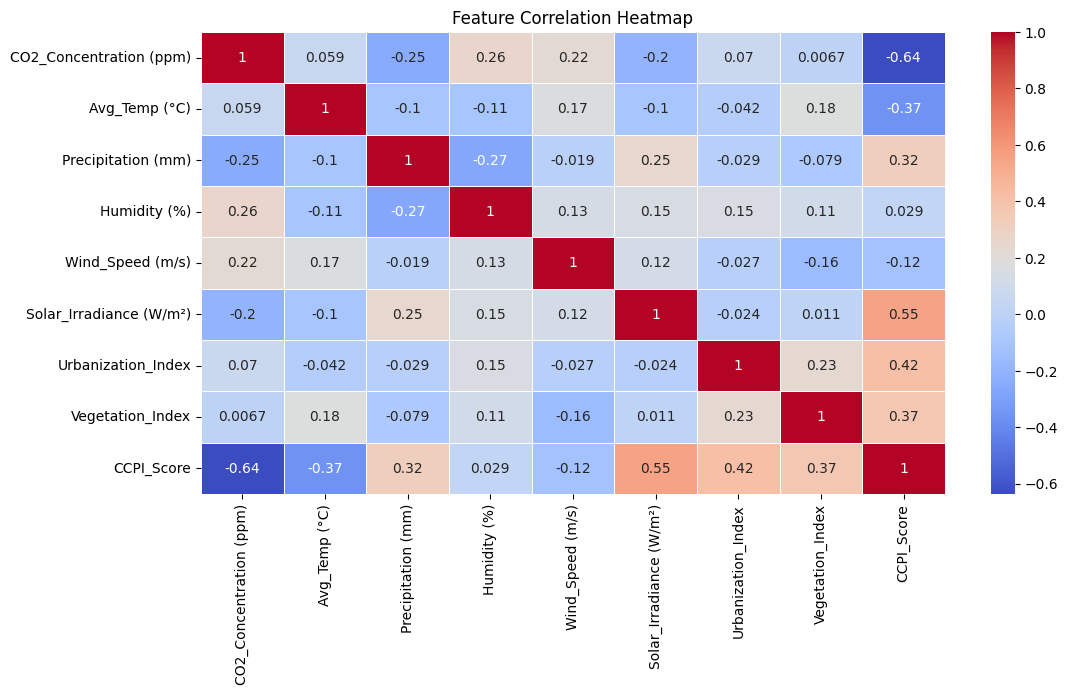

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## 4.3 Feature Importance Using Random Forest

C:\Users\maira\AppData\Local\Temp\ipykernel_16560\4245838701.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")


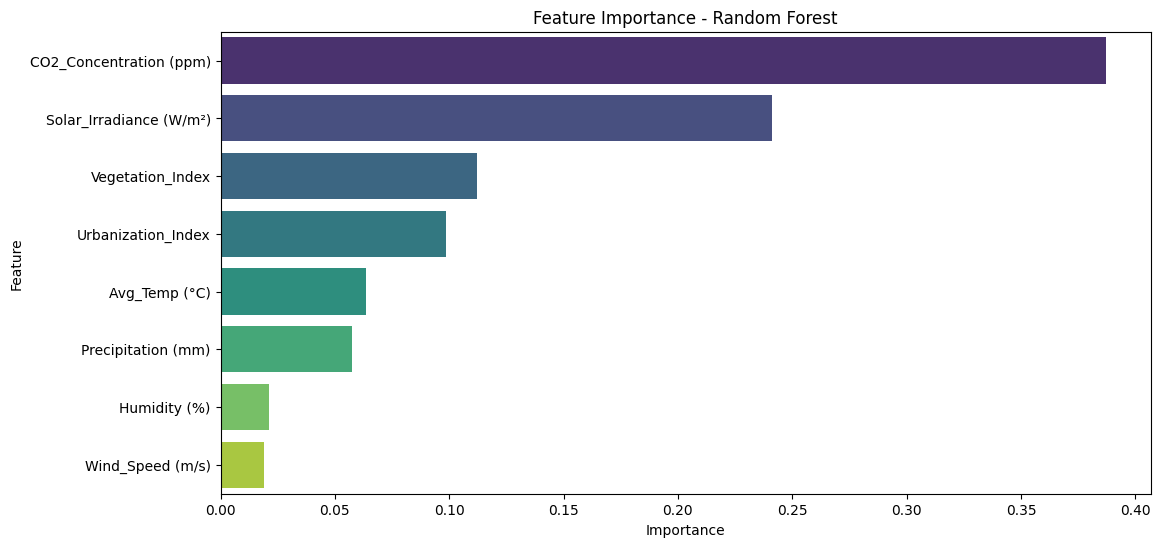

In [16]:
rf_temp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_temp.fit(df[features], df["CCPI_Score"])

importances = rf_temp.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.show()


# Step 5️: Train & Optimize Machine Learning Models

## 5.1 Splitting Data for Machine Learning

In [17]:
# Define features (X) and target variable (y)
X = df[features]
y = df["CCPI_Score"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 5.2 Train & Tune Random Forest Model

In [18]:
param_grid_rf = {
    "n_estimators": [100, 200, 300],  
    "max_depth": [10, 20, 30],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring="r2", n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best RF Parameters:", grid_rf.best_params_)

rf_best = RandomForestRegressor(**grid_rf.best_params_, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_rf_best = rf_best.predict(X_test)


Best RF Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## 5.3 Train & Tune XGBoost Model

In [19]:
param_grid_xgb = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 6, 9],
    "min_child_weight": [1, 3, 5]
}

grid_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=5, scoring="r2", n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print("Best XGBoost Parameters:", grid_xgb.best_params_)

xgb_best = XGBRegressor(**grid_xgb.best_params_, random_state=42)
xgb_best.fit(X_train, y_train)
y_pred_xgb_best = xgb_best.predict(X_test)


Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}


# Step 6️: Model Evaluation & Interpretation

In [21]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))


In [22]:
evaluate_model(y_test, y_pred_rf_best, "Optimized Random Forest")
evaluate_model(y_test, y_pred_xgb_best, "Optimized XGBoost")



Optimized Random Forest Performance:
MAE: 5.619279834845134
MSE: 71.57752841382722
R² Score: 0.6963176071963509

Optimized XGBoost Performance:
MAE: 8.841188694386476
MSE: 173.34776905021582
R² Score: 0.26453642003410593


# Step 7: Residual Analysis

## 7.1 Plot Residuals for Random Forest

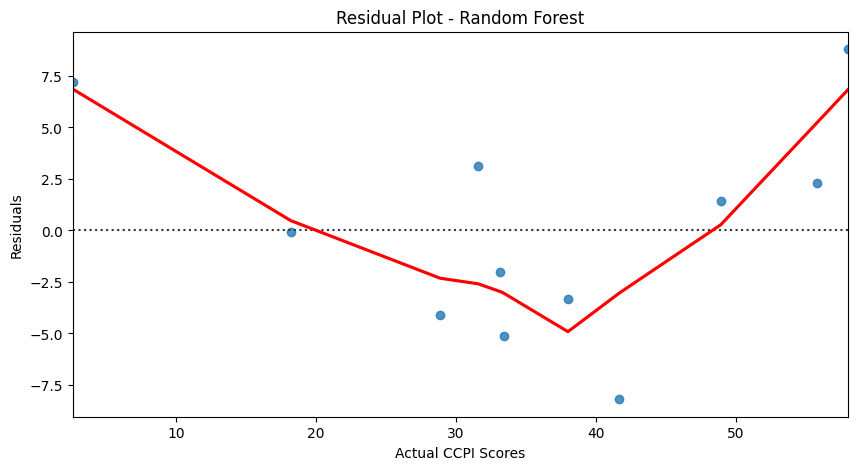

In [23]:
plt.figure(figsize=(10,5))
sns.residplot(x=y_test, y=y_pred_rf_best, lowess=True, line_kws={"color": "red"})
plt.title("Residual Plot - Random Forest")
plt.xlabel("Actual CCPI Scores")
plt.ylabel("Residuals")
plt.show()


## 7.2 Plot Residuals for XGBoost

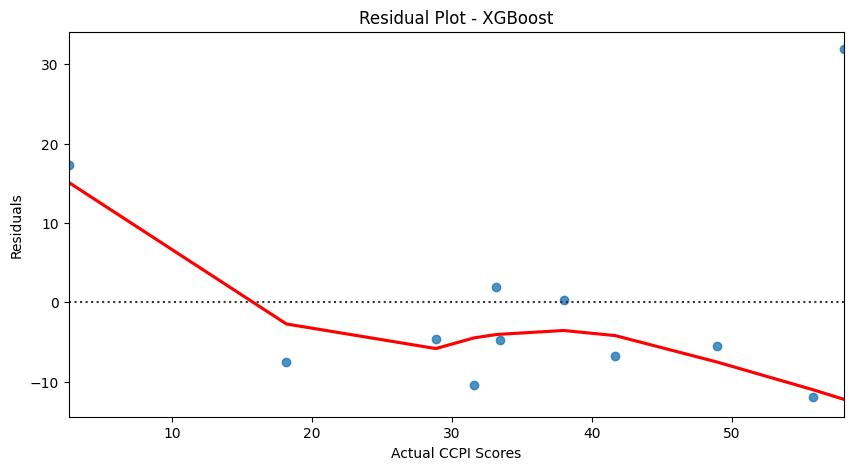

In [24]:
plt.figure(figsize=(10,5))
sns.residplot(x=y_test, y=y_pred_xgb_best, lowess=True, line_kws={"color": "red"})
plt.title("Residual Plot - XGBoost")
plt.xlabel("Actual CCPI Scores")
plt.ylabel("Residuals")
plt.show()


# Step 8️: Learning Curves

## 8.1 Learning Curve for Random Forest

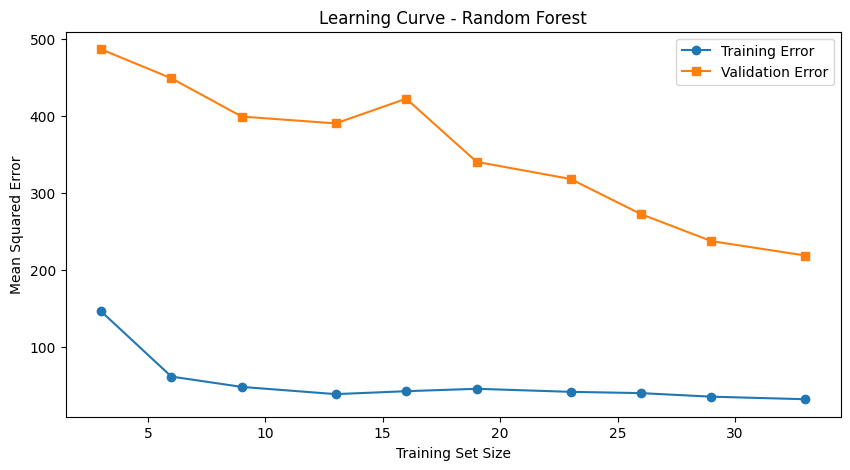

In [25]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_best, X_train, y_train, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label="Training Error", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Error", marker="s")
plt.title("Learning Curve - Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


## 8.2 Learning Curve for XGBoost

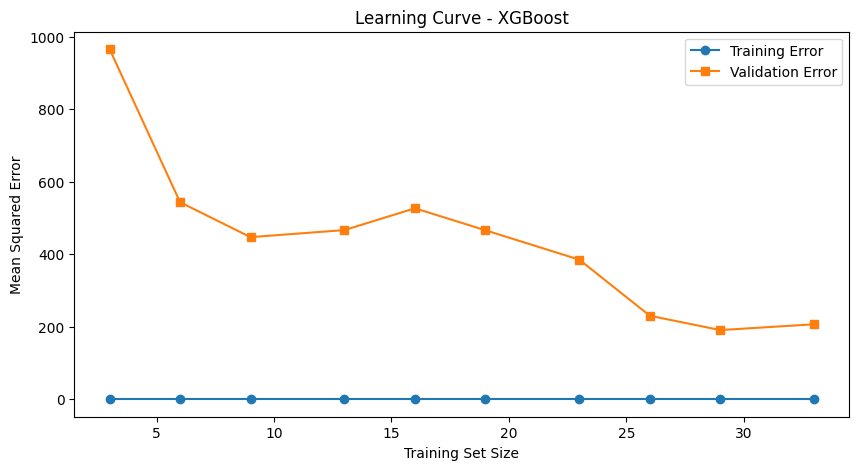

In [26]:
train_sizes, train_scores, test_scores = learning_curve(
    xgb_best, X_train, y_train, cv=5, scoring="neg_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, label="Training Error", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Error", marker="s")
plt.title("Learning Curve - XGBoost")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()
